In [3]:
# Coffee roasting
# Tensorflow imp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [4]:
# Dataset
x, y = load_coffee_data();
print(x.shape, y.shape)

(200, 2) (200, 1)


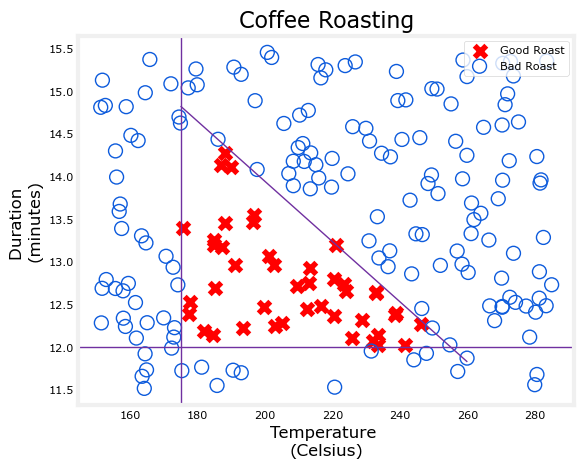

In [5]:
plt_roast(x,y)

In [16]:
# Normalize data manually
def normalize_data(x):
    m,n = x.shape
    mean = np.mean(x)
    std_dev = np.std(x)
    for i in range(m):
        for j in range(n):
            x[i,j] = (x[i,j] - mean) / std_dev
    return x
print(f"Temperature Max, Min post normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")

Temperature Max, Min post normalization: 9.10, -0.21
Duration    Max, Min post normalization: 2.19, -0.93


In [6]:
# Normalize with keras
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)
xn = norm_l(x)
print(f"Temperature Max, Min post normalization: {np.max(xn[:,0]):0.2f}, {np.min(xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(xn[:,1]):0.2f}, {np.min(xn[:,1]):0.2f}")

Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [7]:
# Tile/copy our data to increase the training set size and reduce the number of training epochs.
xt = np.tile(xn, (1000,1))
yt = np.tile(y, (1000,1))
print(xt.shape, yt.shape)

(200000, 2) (200000, 1)


In [8]:
# Tensorflow model
# Model
tf.random.set_seed(30)
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# W, B tensorflow initiated
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.5   0.32 -0.12]
 [ 0.93 -0.86  0.36]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.4 ]
 [-0.97]
 [-0.36]] 
b2(1,): [0.]


In [11]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01)
)
model.fit(xt, yt, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.3908
Epoch 2/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.2327
Epoch 3/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1613
Epoch 4/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1452
Epoch 5/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1402
Epoch 6/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1375
Epoch 7/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1356
Epoch 8/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1339
Epoch 9/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1321
Epoch 10/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1302


In [12]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 7.3  -4.9   5.16]
 [ 2.68 -1.11  6.36]] 
b1: [-2.29 -6.57 -1.62]
W2:
 [[ -9.13]
 [-11.75]
 [-10.96]] 
b2: [3.23]


In [13]:
# Prediction
x_test = np.array([
    [200, 13.9], # pos
    [200, 17] # neg
])
x_testn = norm_l(x_test)
predictions = model.predict(x_testn)
predictions

1/1 [==============================] - 0s 129ms/step


array([[7.01e-01],
       [8.03e-08]], dtype=float32)

In [15]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"Decisions: \n{yhat}")

Decisions: 
[[1.]
 [0.]]


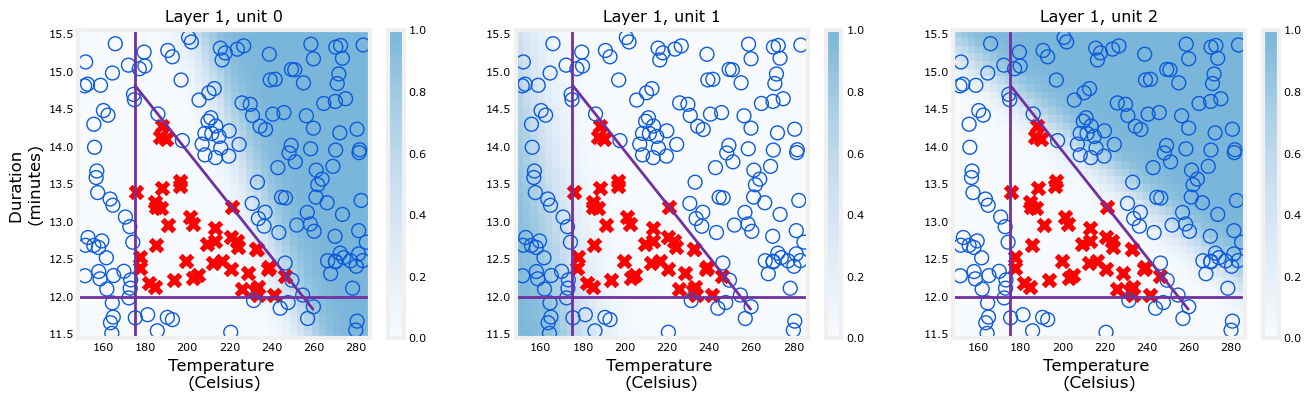

In [16]:
# Layer functions
plt_layer(x,y.reshape(-1,), W1, b1, norm_l)

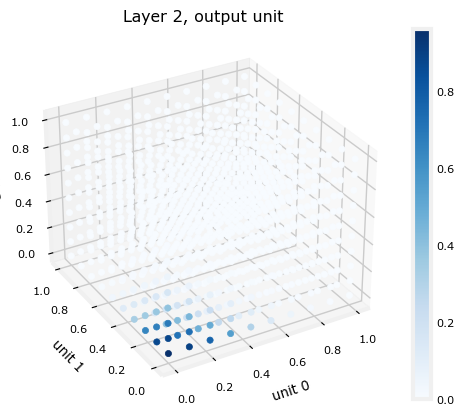

In [17]:
plt_output_unit(W2, b2)